In [5]:
import random
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

In [2]:
N1 = 1000
r1 = 10
r2 = 8

N2 = 1000
r3 = 3
r4 = 1

x1 = []
y1 = []
for i in range(N1):
    r = random.uniform(r2,r1)
    theta = random.uniform(0, 2*np.pi)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    x1.append(x)
    y1.append(y)

x2 = []
y2 = []
for i in range(N2):
    r = random.uniform(0,r3)
    theta = random.uniform(0, 2*np.pi)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    x2.append(x)
    y2.append(y)

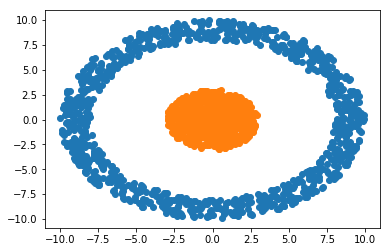

In [3]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)

In [6]:
data1 = pd.DataFrame({"x":x1, 'y':y1})
data2 = pd.DataFrame({"x":x2, 'y':y2})
data_all = pd.concat([data1,data2])

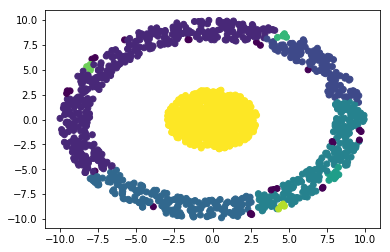

In [9]:
y_pred = DBSCAN().fit_predict(data_all)
plt.scatter(data_all['x'], data_all['y'], c=y_pred)
plt.show()

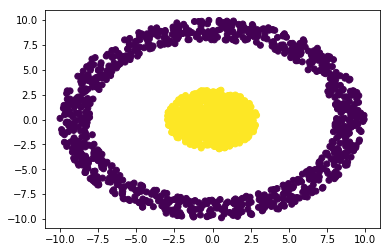

In [10]:
y_pred = DBSCAN(eps = 2).fit_predict(data_all)
plt.scatter(data_all['x'], data_all['y'], c=y_pred)
plt.show()

1，在课上给出的DBSCAN代码中，改变eps和min_samples的值，检验聚类的簇数的改变

Text(0.5, 1.0, 'leaf size ')

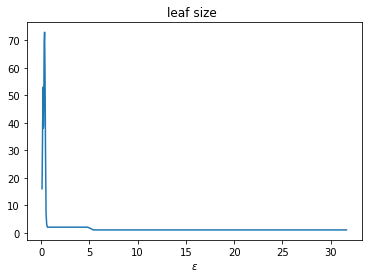

In [63]:
#eps
# X,labels_true = data
epsilons = np.logspace(-1,1.5)
res_dict = dict()
for e in epsilons:
    y_pred = DBSCAN(eps = e).fit_predict(data_all)
    res_dict[e] = len(set(y_pred))
res = pd.DataFrame.from_dict(res_dict, orient='index')
res.columns = ['leaf_size']
plt.plot(res.index, res.leaf_size)
plt.xlabel(r"$\epsilon$")
plt.title('leaf size ')

Text(0.5, 1.0, 'leaf size ')

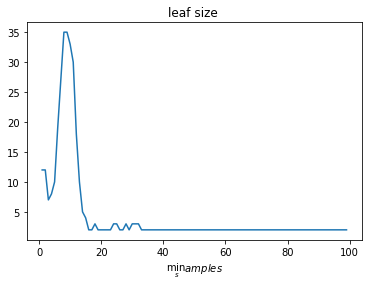

In [65]:
# min_samples
# X,labels_true = data
min_samples=range(1,100)
res_dict = dict()
for s in min_samples:
    y_pred = DBSCAN(min_samples = s).fit_predict(data_all)
    res_dict[s] = len(set(y_pred))
res = pd.DataFrame.from_dict(res_dict, orient='index')
res.columns = ['leaf_size']
plt.plot(res.index, res.leaf_size)
plt.xlabel(r"$\min_samples$")
plt.title('leaf size ')

In [14]:
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import mixture
from sklearn.svm.libsvm import predict

def create_data(centers,num=100,std=0.7):
    X,labels_true = make_blobs(n_samples=num,centers=centers, cluster_std=std)
    return X,labels_true

def plot_data(*data):
    X,labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbycm'
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(X[position,0],X[position,1],label="cluster %d"%label),
        color=colors[i%len(colors)]

    ax.legend(loc="best",framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()
    
def test_DBSCAN(*data):
    X,labels_true = data
    clst = cluster.DBSCAN();
    predict_labels = clst.fit_predict(X)
    print("ARI:%s"%adjusted_rand_score(labels_true,predict_labels))
    print("Core sample num:%d"%len(clst.core_sample_indices_))

def test_DBSCAN_epsilon(*data):
    X,labels_true = data
    epsilons = np.logspace(-1,1.5)
    ARIs=[]
    Core_nums = []
    for epsilon in epsilons:
        clst = cluster.DBSCAN(eps=epsilon)
        predicted_labels = clst.fit_predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Core_nums.append(len(clst.core_sample_indices_))

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,2,1)
    ax.plot(epsilons,ARIs,marker = '+')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylim(0,1)
    ax.set_ylabel('ARI')

    ax = fig.add_subplot(1,2,2)
    ax.plot(epsilons,Core_nums,marker='o')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel('Core_num')

    fig.suptitle("DBSCAN")
    plt.show()
    
def test_DBSCAN_min_samples(*data):
    X,labels_true=data
    min_samples=range(1,100)
    ARIs=[]
    Core_nums=[]
    for num in min_samples:
        clst=cluster.DBSCAN(min_samples=num)
        predicted_labels=clst.fit_predict(X)
        ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
        Core_nums.append(len(clst.core_sample_indices_))

    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(1,2,1)
    ax.plot(min_samples,ARIs,marker='+')
    ax.set_xlabel("min_samples")
    ax.set_ylim(0,1)
    ax.set_ylabel('ARI')

    ax=fig.add_subplot(1,2,2)
    ax.plot(min_samples,Core_nums,marker='o')
    ax.set_xlabel("min_samples")
    ax.set_ylabel('Core_nums')

    fig.suptitle("DBSCAN")
    plt.show()

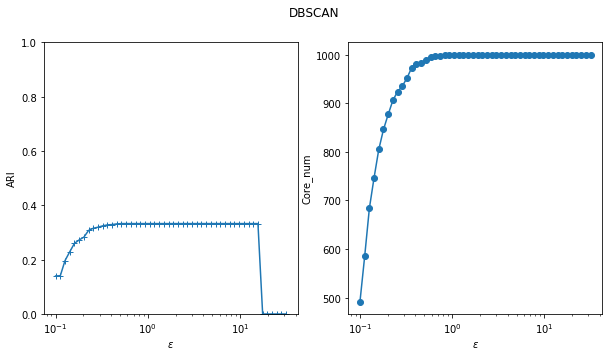

In [66]:
centers = [[1,1],[1,2],[2,2],[10,20]]
X,labels_true = create_data(centers,1000,0.5)
test_DBSCAN_epsilon(X,labels_true)

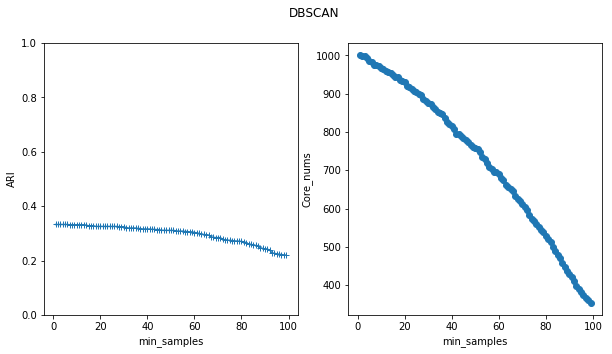

In [25]:
centers = [[1,1],[1,2],[2,2],[10,20]]
X,labels_true = create_data(centers,1000,0.5)
test_DBSCAN_min_samples(X,labels_true)